In [1]:
import pandas as pd

In [2]:
# now we can use the normalized weights to calculate the liveability score for each suburb

suburbs = pd.read_csv('../data/curated/procesed_data.csv')

In [3]:
# lower case all columns
suburbs.columns = map(str.lower, suburbs.columns)

# replace spaces with underscores in column names
suburbs.columns = suburbs.columns.str.replace(' ', '_')


In [4]:
suburbs.columns

Index(['distance_to_cbd', 'time_to_cbd', 'distance_to_station',
       'time_to_station', 'year', 'average_household_size',
       'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p',
       'average_quarterly_count', 'sal_code', 'median_score', 'average_price',
       'proximity_to_beach', 'airbnb_count', 'commercial_density',
       'education_density', 'food_establishments_density',
       'healthcare_density', 'industrial_density', 'public_transport_density',
       'recreation_density', 'residential_density', 'shopping_density',
       'pop_density', 'interest_rate', 'median_tot_fam_inc_weekly/inflation',
       'median_tot_hhd_inc_weekly/inflation',
       'median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
       'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
       'average_weekly_rent/inflation/household_size',
       'a_crimes_against_the_person/per_person',
       'b_property_and_deception_offences/per_person',
       'c_drug_offences/per_person

In [5]:
import pandas as pd

# List of variables
variables = [
    'distance_to_cbd', 'time_to_cbd', 'distance_to_station', 'time_to_station',
    'cemeteries', 'civic_squares_and_promenades', 'conservation_reserves',
    'government_schools', 'natural_and_semi-natural_open_space', 'non-government_schools',
    'parks_and_gardens', 'public_housing_reserves', 'recreation_corridor',
    'services_and_utilities_reserves', 'sportsfields_and_organised_recreation',
    'tertiary_institutions', 'transport_reservations', 'year', 'average_household_size',
    'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p',
    'average_quarterly_count', 'commercial', 'education', 'food_establishments',
    'healthcare', 'industrial', 'public_transport', 'recreation', 'residential',
    'shopping', 'sal_code', 'median_score', 'average_price', 'proximity_to_beach',
    'interest_rate', 'median_tot_fam_inc_weekly/inflation',
    'median_tot_hhd_inc_weekly/inflation', 'median_tot_prsnl_inc_weekly/inflation',
    'average_weekly_rent/inflation/household_size', 'a_crimes_against_the_person/per_person',
    'b_property_and_deception_offences/per_person', 'c_drug_offences/per_person',
    'd_public_order_and_security_offences/per_person', 'e_justice_procedures_offences/per_person',
    'f_other_offences/per_person'
]

# Hypothetical liveability coefficients
coefficients = [
    0,  # distance_to_cbd
    -0.6,  # time_to_cbd
    0,  # distance_to_station
    -0.5,  # time_to_station
    -0.2,  # cemeteries
    0.1,   # civic_squares_and_promenades
    0.1,   # conservation_reserves
    0.2,   # government_schools
    0.2,   # natural_and_semi-natural_open_space
    0.2,   # non-government_schools
    0.3,   # parks_and_gardens
    -0.8,  # public_housing_reserves
    0.2,   # recreation_corridor
    0.3,   # services_and_utilities_reserves
    0.4,   # sportsfields_and_organised_recreation
    0.3,   # tertiary_institutions
    -0.2,   # transport_reservations
    0.0,   # year
    0.1,   # average_household_size
    -0.1,  # average_num_psns_per_bedroom
    0.0,   # median_age_persons
    0.0,   # tot_p_p
    0.0,   # average_quarterly_count
    0.5,   # commercial
    0.1,   # education
    0.1,   # food_establishments
    0.4,   # healthcare
    -1.5,  # industrial
    0.1,   # public_transport
    0.3,   # recreation
    0.2,   # residential
    0.3,   # shopping
    0.0,   # sal_code
    0.9,   # median_score
    0.3,   # average_price
    -0.8,   # proximity_to_beach
    0,     # interest_rate
    0.7,   # median_tot_fam_inc_weekly/inflation
    0.7,   # median_tot_hhd_inc_weekly/inflation
    0.7,   # median_tot_prsnl_inc_weekly/inflation
    -0.2,  # average_weekly_rent/inflation/household_size
    -2,  # a_crimes_against_the_person/per_person
    -1,  # b_property_and_deception_offences/per_person
    -1.8,  # c_drug_offences/per_person
    -0.6,  # d_public_order_and_security_offences/per_person
    -0.7,  # e_justice_procedures_offences/per_person
    -0.6   # f_other_offences/per_person
]

df_weights = pd.DataFrame({
    'Variable': variables,
    'Liveability_Coefficient': coefficients
})

# Create DataFrame
df_liveability = pd.DataFrame({
    'Variable': variables,
    'Liveability_Coefficient': coefficients
})

# Display the DataFrame
print(df_liveability)


                                           Variable  Liveability_Coefficient
0                                   distance_to_cbd                      0.0
1                                       time_to_cbd                     -0.6
2                               distance_to_station                      0.0
3                                   time_to_station                     -0.5
4                                        cemeteries                     -0.2
5                      civic_squares_and_promenades                      0.1
6                             conservation_reserves                      0.1
7                                government_schools                      0.2
8               natural_and_semi-natural_open_space                      0.2
9                            non-government_schools                      0.2
10                                parks_and_gardens                      0.3
11                          public_housing_reserves                     -0.8

In [6]:
from sklearn.preprocessing import StandardScaler

# standardise the data
# Exclude 'sal_code' from standardization
columns_to_standardize = [col for col in suburbs.columns if col != 'sal_code']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
suburbs[columns_to_standardize] = scaler.fit_transform(suburbs[columns_to_standardize])

In [7]:
# weight the features
suburbs['liveability_score'] = 0

for i in range(len(variables)):
    suburbs['liveability_score'] += suburbs[variables[i]] * coefficients[i]

# group suburb by sal_code and calculate the mean liveability score
suburbs = suburbs.groupby('sal_code').mean()

suburbs.reset_index(inplace=True)
    

KeyError: 'cemeteries'

In [217]:
# merge with shapefile find name

import geopandas as gpd
SAL = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

In [218]:
# Filter out non-numeric values
SAL = SAL[SAL['SAL_CODE21'].apply(lambda x: x.isnumeric())]

# Ensure 'SAL_CODE21' is of type int in SAL GeoDataFrame
SAL['SAL_CODE21'] = SAL['SAL_CODE21'].astype(int)

# Merge top_ten with SAL GeoDataFrame on 'sal_code' and 'SAL_CODE21'
suburbs = SAL.merge(suburbs, left_on='SAL_CODE21', right_on='sal_code')


# Get top ten suburbs by liveability score
top_ten = suburbs.nlargest(20, 'liveability_score')
bottom_ten = suburbs.nsmallest(20, 'liveability_score')
print(top_ten[['sal_code', 'liveability_score']])

     sal_code  liveability_score
55      20337          15.483284
183     21152          15.317870
166     21010          13.510856
70      20453          12.562589
214     21336          12.096046
384     22547          11.966896
24      20124          11.918867
39      20224          11.539635
274     21793          11.240559
23      20123          10.924233
80      20523          10.752201
277     21816          10.579819
199     21246          10.550471
371     22399          10.457517
242     21587          10.450040
140     20885           9.997619
10      20066           9.948800
215     21337           9.831013
11      20077           9.697959
56      20338           9.689557


In [219]:
bottom_ten['liveability_score']

161   -37.700476
21    -32.209887
271   -28.115936
57    -24.170097
247   -23.945252
255   -23.251496
343   -23.020635
259   -21.616940
368   -21.048498
111   -19.994989
19    -19.870365
71    -19.455207
372   -18.884136
157   -18.770985
79    -18.560713
323   -17.971276
344   -17.604247
96    -17.286645
97    -16.871437
190   -16.180811
Name: liveability_score, dtype: float64

In [220]:
top_ten['liveability_score']

55     15.483284
183    15.317870
166    13.510856
70     12.562589
214    12.096046
384    11.966896
24     11.918867
39     11.539635
274    11.240559
23     10.924233
80     10.752201
277    10.579819
199    10.550471
371    10.457517
242    10.450040
140     9.997619
10      9.948800
215     9.831013
11      9.697959
56      9.689557
Name: liveability_score, dtype: float64

In [221]:
top_ten['SAL_NAME21']

55       Brighton (Vic.)
183      Hawthorn (Vic.)
166     Glen Iris (Vic.)
70     Camberwell (Vic.)
214           Kew (Vic.)
384               Toorak
24          Balwyn North
39               Berwick
274          Mount Eliza
23                Balwyn
80       Caulfield North
277       Mount Waverley
199       Ivanhoe (Vic.)
371         Surrey Hills
242         Malvern East
140             Essendon
10       Armadale (Vic.)
215             Kew East
11             Ashburton
56         Brighton East
Name: SAL_NAME21, dtype: object

In [222]:
bottom_ten['SAL_NAME21']

161                Geelong
21        Ballarat Central
271                Morwell
57     Broadmeadows (Vic.)
247          Melton (Vic.)
255                Mildura
343         Seymour (Vic.)
259                    Moe
368        Sunshine (Vic.)
111              Dandenong
19              Bairnsdale
71           Campbellfield
372              Swan Hill
157        Frankston North
79          Caulfield East
323        Richmond (Vic.)
344             Shepparton
96      Collingwood (Vic.)
97                Coolaroo
190        Heidelberg West
Name: SAL_NAME21, dtype: object

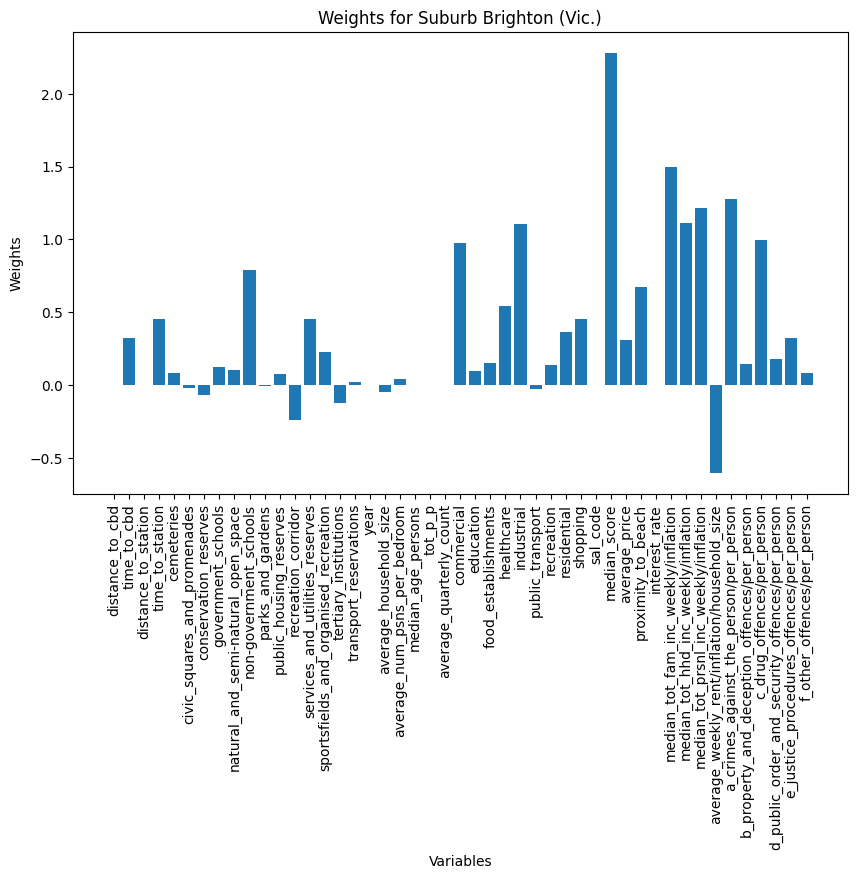

[-0.0, 0.3255844404619184, -0.0, 0.4544740763058561, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.12225709958180218, 0.10264103075239604, 0.7899362142674428, -0.0034968786354287796, 0.07663828921163196, -0.23997182165749353, 0.4524975766065763, 0.22510380421578555, -0.12329421314397483, 0.022309841212958013, 0.0, -0.04860891239005643, 0.04312169184365695, 0.0, 0.0, -0.0, 0.9740630510367535, 0.09652150099632378, 0.14995355311966382, 0.5461055934782605, 1.1060147389149366, -0.028723621658934557, 0.1387349732888966, 0.3620113341505915, 0.4556870747480126, 0.0, 2.2796107227720546, 0.3084321097066907, 0.6722632406198021, -0.0, 1.4981578019270552, 1.1110197557197388, 1.2187449516162019, -0.6034791018349931, 1.2767577698774, 0.14317722382004877, 0.9985658661537969, 0.17681372070685905, 0.32148276934792586, 0.0856953925772678]


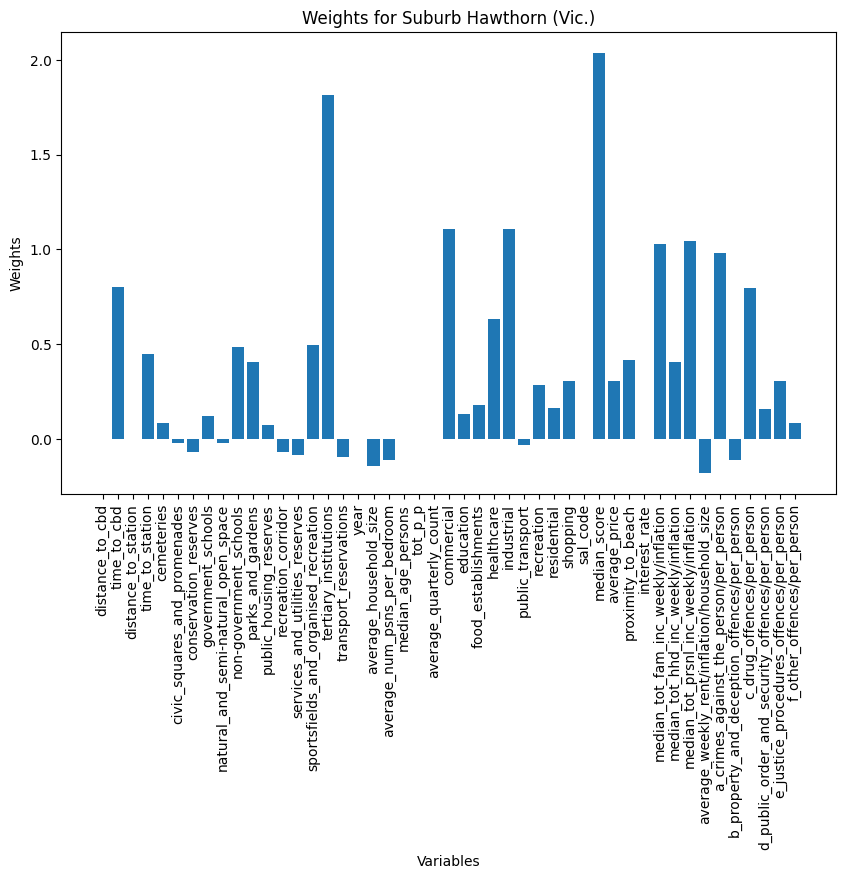

[-0.0, 0.8035838431583741, -0.0, 0.4489915141755857, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.12225709958180218, -0.019323386398600543, 0.4839119866773934, 0.4085969602548723, 0.07663828921163196, -0.06898177286191874, -0.0822816978946586, 0.4964640587817961, 1.8120358076139118, -0.0930176781056647, 0.0, -0.13984736704083398, -0.10855332415460094, -0.0, 0.0, 0.0, 1.110016225600512, 0.13394253012474924, 0.18272397313579805, 0.6322071135522045, 1.1060147389149366, -0.028723621658934557, 0.2863055788601892, 0.1650170241126515, 0.3049745271426894, 0.0, 2.03528609341912, 0.3066548190510063, 0.4188945240487707, -0.0, 1.0304680268294646, 0.4089025627226104, 1.0452348057463552, -0.17736207187636818, 0.9811335112844672, -0.10777660280153338, 0.7955617680260041, 0.1575806729057983, 0.3094096725178477, 0.08444822756336373]


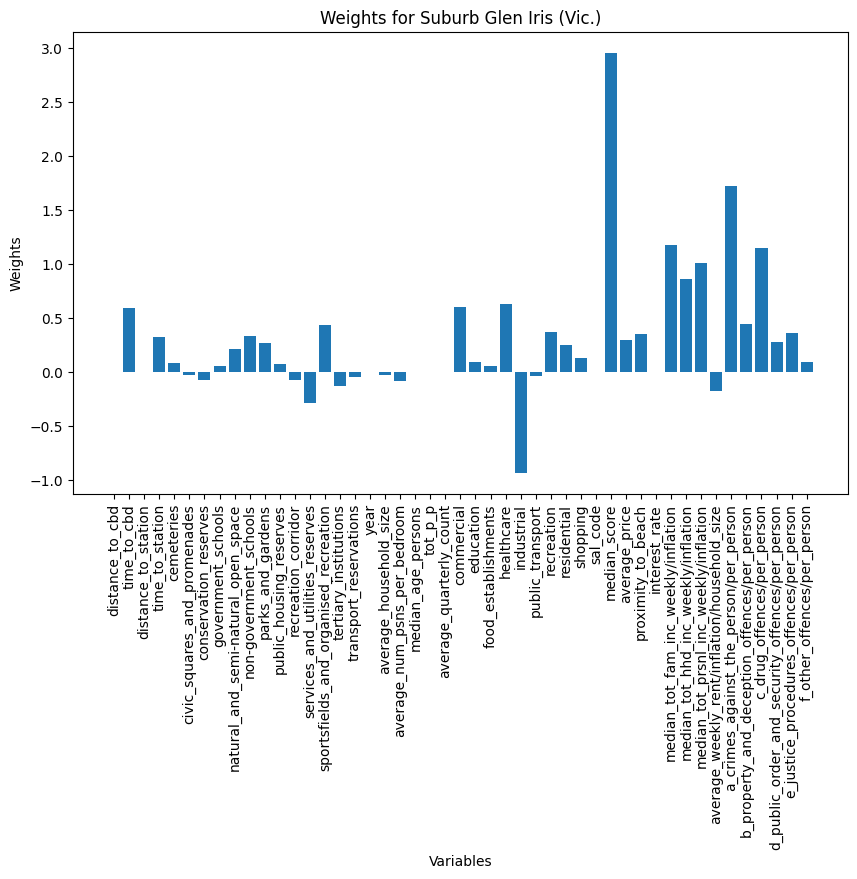

[-0.0, 0.5935193563648083, -0.0, 0.33052057477429125, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.06364683191479494, 0.2150225491415716, 0.33377167829760046, 0.2747207951730572, 0.07663828921163196, -0.06898177286191874, -0.2803158443000307, 0.4430601244490466, -0.12329421314397483, -0.04643750690821079, 0.0, -0.01996262269073322, -0.07495594436156237, 0.0, 0.0, 0.0, 0.6096412839676891, 0.0932719326415613, 0.06430447406709953, 0.6354282323275487, -0.9308290321164217, -0.028723621658934557, 0.3738732304037731, 0.2584690244773276, 0.13717647120271786, 0.0, 2.9583277263389296, 0.3025938050935347, 0.3548958546316432, -0.0, 1.1846863071652922, 0.8656507630447526, 1.0102210257194297, -0.1679104613430753, 1.7257393279388584, 0.44835598769002655, 1.1516370045492497, 0.28504475001984914, 0.3698935478859095, 0.09567457881776623]


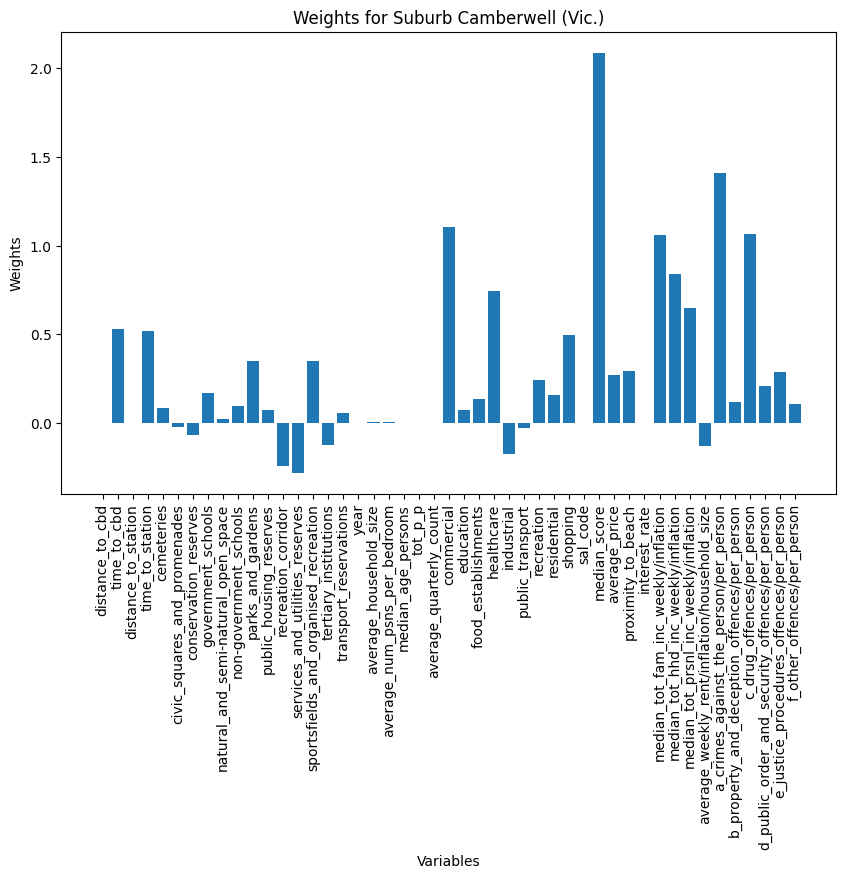

[-0.0, 0.5321520600152044, -0.0, 0.5202930075911537, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.17014517513775776, 0.023944179157264985, 0.09775240567682254, 0.3493325923736686, 0.07663828921163196, -0.23997182165749353, -0.2803158443000307, 0.3478504382753808, -0.12329421314397483, 0.05494900918664039, 0.0, 0.007883119470778683, 0.007708389221342562, 0.0, 0.0, 0.0, 1.104281042203425, 0.0717049574595, 0.13474825170732682, 0.7439009876552272, -0.1715151621121771, -0.028723621658934557, 0.2429219465033153, 0.16072158121473398, 0.49741362267368094, 0.0, 2.085301522387086, 0.27311380729949086, 0.29263912152873134, -0.0, 1.060203330118596, 0.8388632932363663, 0.6468416893591862, -0.12793841946361434, 1.4088128382368148, 0.11772594498436571, 1.0644119645578773, 0.20783478576904704, 0.2883592174244746, 0.10941888169915855]


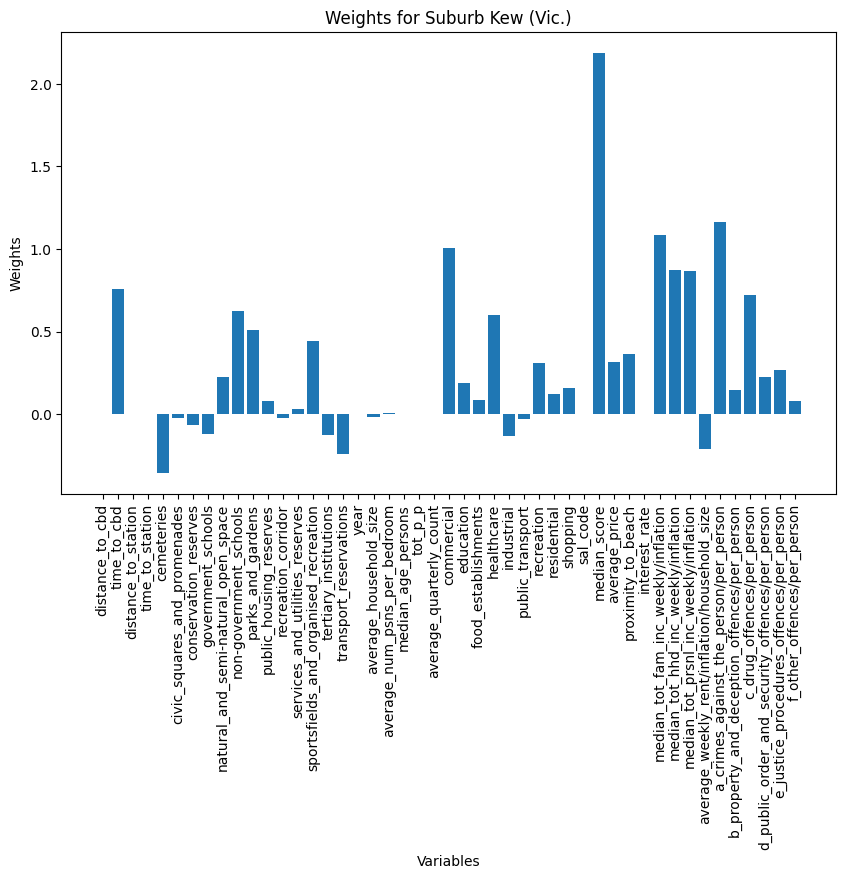

[-0.0, 0.7593248379978441, -0.0, -0.0013815492103402972, -0.3562589640129732, -0.02084471417816023, -0.06824589188392581, -0.11841328833508269, 0.22273709304267486, 0.6262051492049228, 0.5112768344056065, 0.07663828921163196, -0.024206402957966586, 0.03356085161480747, 0.4430601244490466, -0.12329421314397483, -0.23977050097099425, 0.0, -0.01996262269073322, 0.007708389221342562, 0.0, 0.0, -0.0, 1.0058531508615673, 0.18739804918117234, 0.0858111215541398, 0.6019076130769051, -0.13237284397447557, -0.028723621658934557, 0.3117388502378775, 0.12024810466995078, 0.15585093994805863, 0.0, 2.187289804908789, 0.315504087870428, 0.3643187185582268, -0.0, 1.0863053932397178, 0.874620133437481, 0.8647323913839816, -0.21066441774630654, 1.1606889056438803, 0.14569369377020702, 0.721009042157004, 0.22608245214395656, 0.26778640060591324, 0.0768346574751248]


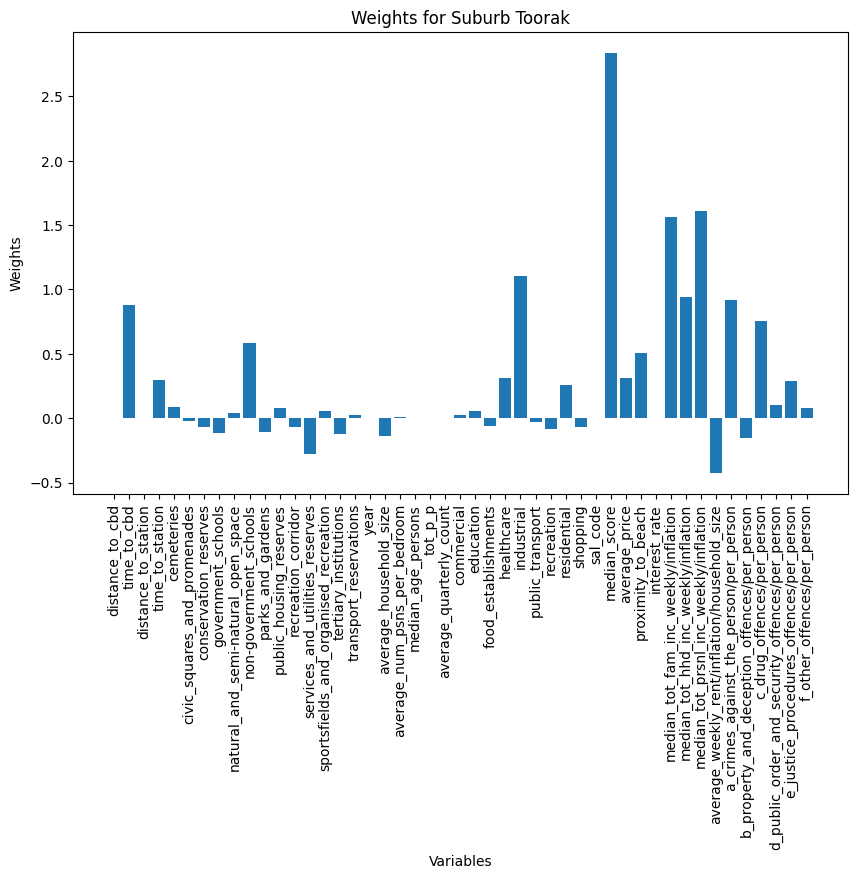

[-0.0, 0.8813899107190643, -0.0, 0.29659427462715476, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, -0.11841328833508269, 0.04165882217689771, 0.5809346471530902, -0.10991080061117434, 0.07663828921163196, -0.06898177286191874, -0.2803158443000307, 0.052102140174905366, -0.12329421314397483, 0.022309841212958013, 0.0, -0.13984736704083398, 0.007708389221342562, 0.0, 0.0, -0.0, 0.024075689005153292, 0.05414347810605045, -0.0577393187506822, 0.3091076106258355, 1.1060147389149366, -0.028723621658934557, -0.0806093467861284, 0.2573515991257545, -0.06549989928806356, 0.0, 2.8366973034256255, 0.3110481904168622, 0.5037058844704261, -0.0, 1.5649537371786217, 0.9421342124765006, 1.6097158048499154, -0.4253749188332145, 0.9170909952962224, -0.15167643684023607, 0.7535055213345936, 0.10432131140459015, 0.2872827473481151, 0.08031676618825169]


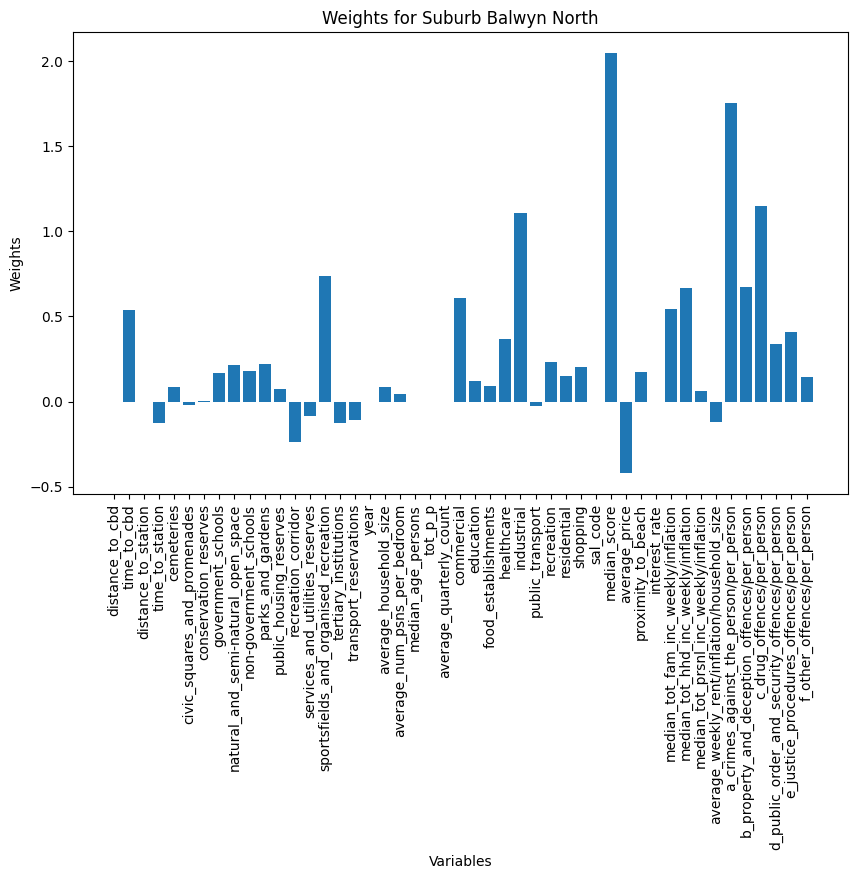

[-0.0, 0.5383768152119056, 0.0, -0.12448586494664156, 0.08557171081375514, -0.02084471417816023, 0.0009923770362101677, 0.17014517513775776, 0.21236052155697896, 0.17788775908734403, 0.21853501687222915, 0.07663828921163196, -0.23997182165749353, -0.0822816978946586, 0.7388084225495221, -0.12329421314397483, -0.10574481690246072, 0.0, 0.08703549742948835, 0.04312169184365695, 0.0, 0.0, -0.0, 0.609161201101108, 0.11890148982610788, 0.08920726846947613, 0.36611977995360406, 1.1060147389149366, -0.028723621658934557, 0.23020735321697916, 0.15016960814856392, 0.2041434019566708, 0.0, 2.0488213326484916, -0.4196894896433479, 0.17633837254386303, -0.0, 0.54458683907149, 0.6670209232977596, 0.06378712563028739, -0.12230978164027756, 1.7532829078997618, 0.6744229082740296, 1.1468162078040085, 0.33630524533822187, 0.4076267176504692, 0.1438060548352168]


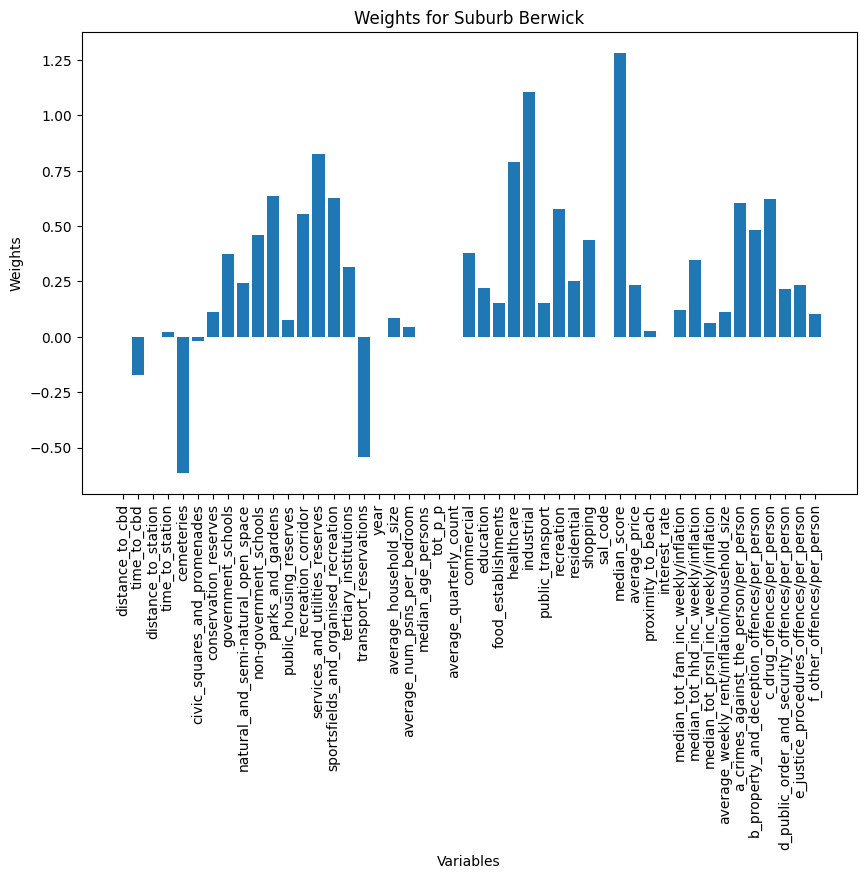

[0.0, -0.17016319160952206, -0.0, 0.02294279477459384, -0.6147133404549323, -0.02084471417816023, 0.11073243688947282, 0.3732290914772302, 0.2415617088652279, 0.4596745102633259, 0.6372512200689214, 0.07663828921163196, 0.5566022024520856, 0.825697437236296, 0.6254396297889936, 0.3149094310590462, -0.5408505707979377, 0.0, 0.08703549742948835, 0.04312169184365695, -0.0, 0.0, 0.0, 0.37619878406715285, 0.22213152002751807, 0.15165567503968516, 0.7875267982004849, 1.1060147389149366, 0.15207495828460021, 0.5790541732587794, 0.25280951439888255, 0.4376186190893914, 0.0, 1.2814702900400237, 0.23578859374882363, 0.02537271875815141, -0.0, 0.12225204551621092, 0.34753117928177835, 0.06390384261761568, 0.11071683263341946, 0.6024901526744981, 0.4823469945003802, 0.6203017666597791, 0.21778337860645997, 0.23368209099977408, 0.1026462414692344]


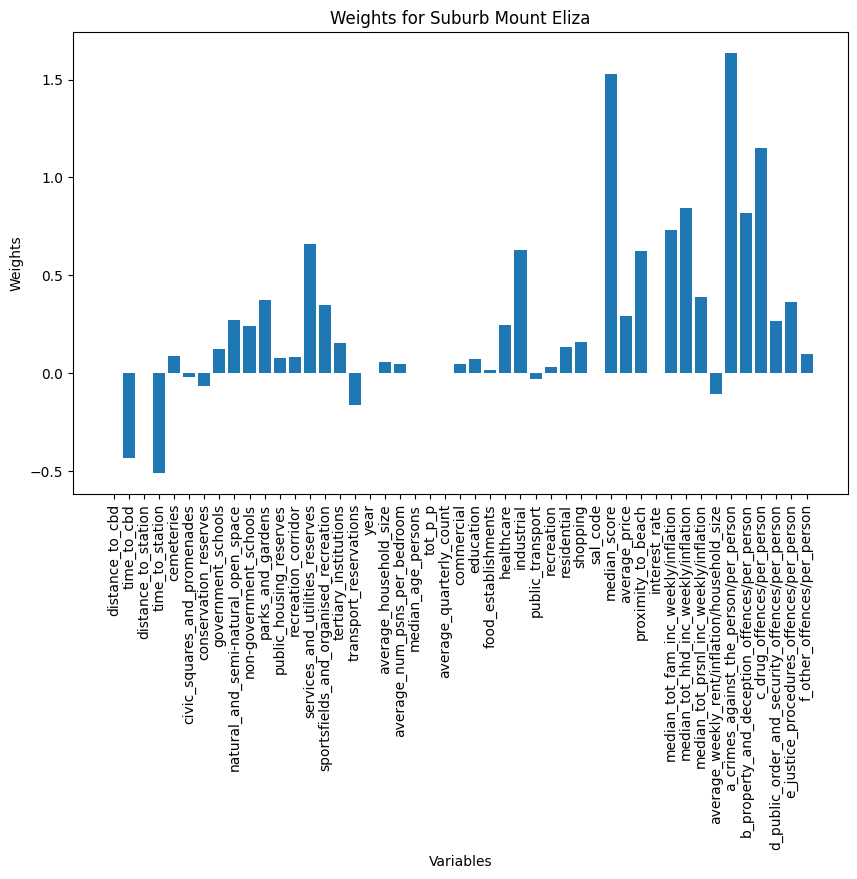

[0.0, -0.4368820668428969, 0.0, -0.5115662996289337, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.12225709958180218, 0.2715415034282648, 0.240045568204352, 0.37451235284241163, 0.07663828921163196, 0.08367630639179686, 0.6613142434444838, 0.3478504382753808, 0.1531815041071518, -0.1650521268967106, 0.0, 0.05357761277386145, 0.04312169184365695, 0.0, 0.0, -0.0, 0.043935802710935404, 0.06988860328257161, 0.01566963065287339, 0.24655035404335762, 0.626941026029769, -0.028723621658934557, 0.0320258506738081, 0.13400652804835622, 0.15903670196625272, 0.0, 1.5289559306981344, 0.292517824637105, 0.6235149203604564, -0.0, 0.7320450758235434, 0.8440881249629222, 0.38770579298538765, -0.10803699511939889, 1.6359141797274102, 0.8159624077497059, 1.1525367715420876, 0.2644872223661548, 0.3625215021399026, 0.0983183695887965]


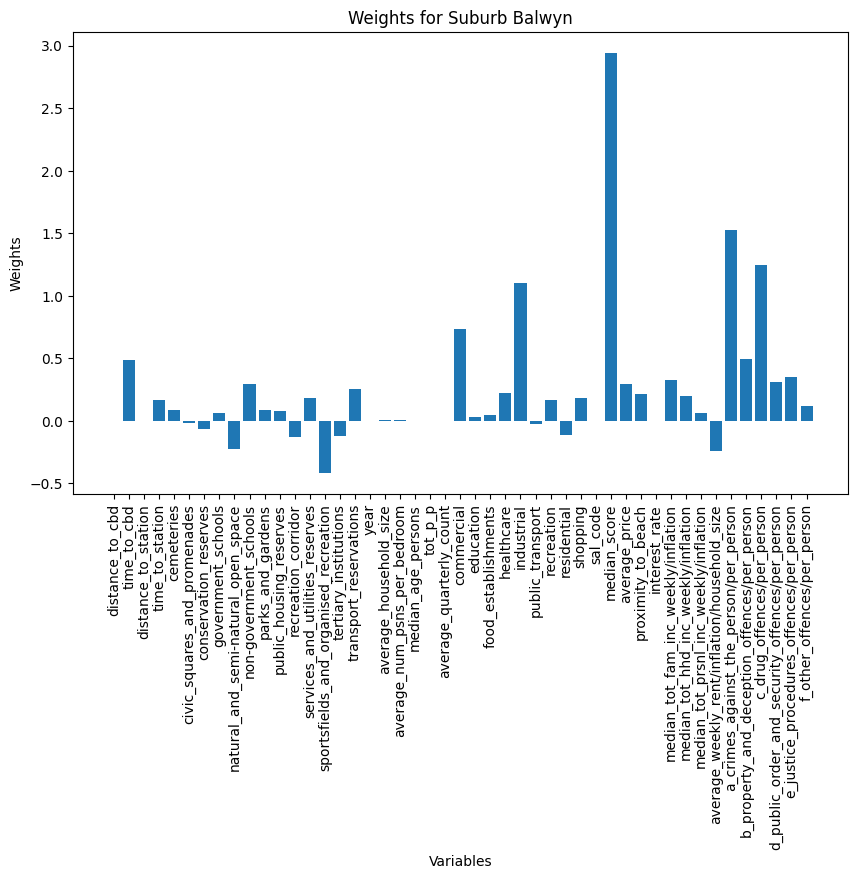

[-0.0, 0.4859092766871286, -0.0, 0.1686715338076999, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.06364683191479494, -0.22782293466132822, 0.290832196177108, 0.09067538225275207, 0.07663828921163196, -0.13208911230773007, 0.17950520398564002, -0.41664782196645006, -0.12329421314397483, 0.25772204137634275, 0.0, 0.007883119470778683, 0.007708389221342562, 0.0, 0.0, -0.0, 0.7363187032804444, 0.03231437210327809, 0.05052692750563851, 0.2201798376423529, 1.1060147389149366, -0.028723621658934557, 0.16514523123742061, -0.1125348649567562, 0.18424078726674625, 0.0, 2.941197626458245, 0.29755738826404105, 0.21229291044104662, -0.0, 0.3262155617831077, 0.19877846429335455, 0.06275024015598323, -0.2370663835077872, 1.5240213733340913, 0.4947564787342831, 1.2442819913196033, 0.308720894830344, 0.3503806854086294, 0.12104415861194967]


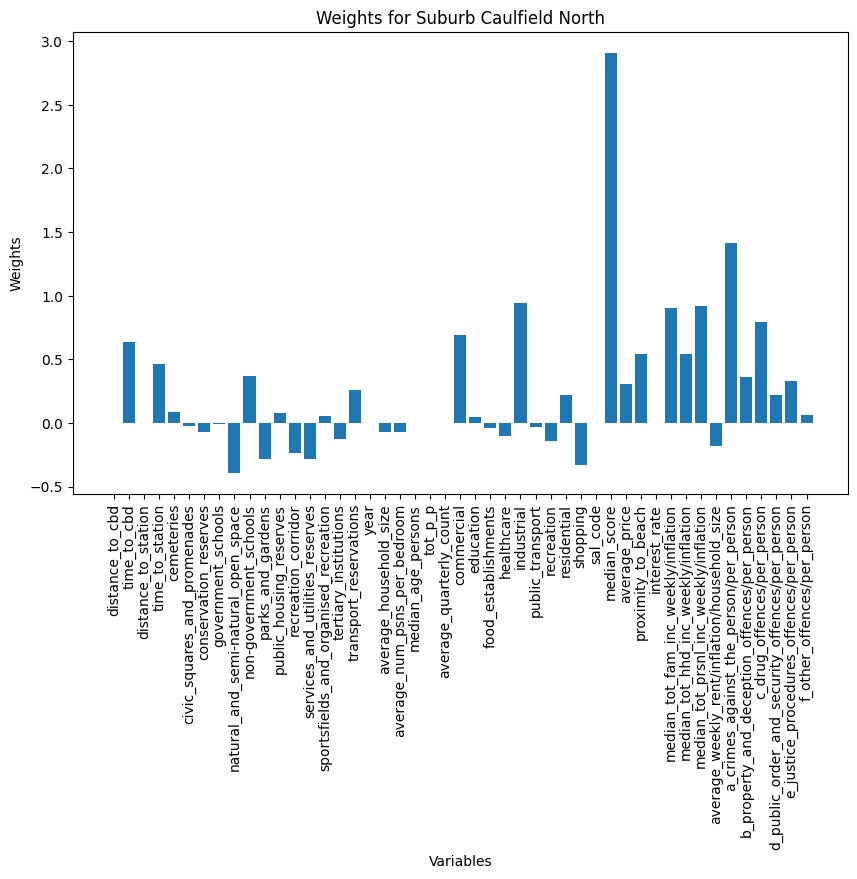

[-0.0, 0.6328503351726822, -0.0, 0.4626141564300178, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, -0.011914945112119836, -0.3930549173681903, 0.37096754958762945, -0.28000726317744956, 0.07663828921163196, -0.23997182165749353, -0.2803158443000307, 0.052102140174905366, -0.12329421314397483, 0.25772204137634275, 0.0, -0.06944116855134895, -0.07495594436156237, -0.0, 0.0, 0.0, 0.688183315618185, 0.04938910529471569, -0.038135722493134676, -0.10234956475546896, 0.9463235012865474, -0.028723621658934557, -0.1450744280815361, 0.218569177482916, -0.331863551162322, 0.0, 2.9068746832980197, 0.306563306649648, 0.5422727555930797, -0.0, 0.9050836381933289, 0.5418987384126309, 0.9190915735460798, -0.18077493441312076, 1.4133529647749703, 0.3635432325938749, 0.7909396421577372, 0.220682059867534, 0.3295178238145067, 0.06041796419150561]


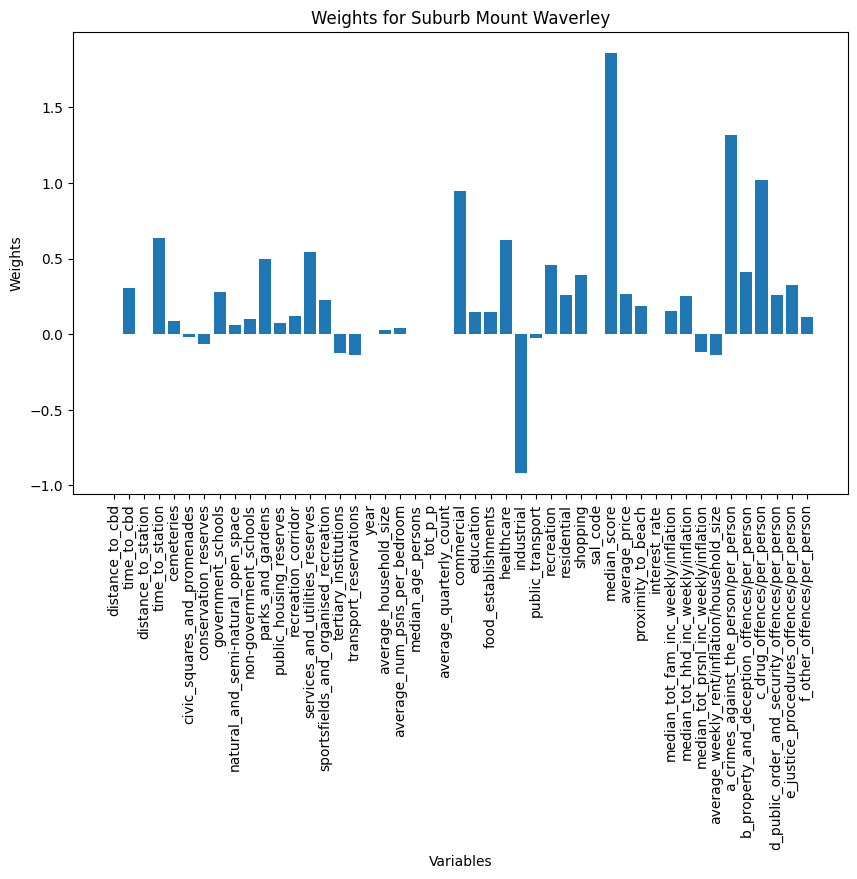

[-0.0, 0.3034505144666307, -0.0, 0.6336175226720386, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.27664351836072065, 0.057505110335812765, 0.09775240567682254, 0.499776591667658, 0.07663828921163196, 0.11840678148405331, 0.5454716939350177, 0.22510380421578555, -0.12329421314397483, -0.13838398487614306, 0.0, 0.02699872180536248, 0.04312169184365695, 0.0, 0.0, -0.0, 0.9479517015070915, 0.14816831006764866, 0.14841695967797672, 0.6257585047380808, -0.9188222477630489, -0.028723621658934557, 0.4598544090232811, 0.25851658983557424, 0.3919364572190198, 0.0, 1.8608742187569354, 0.26303630708014336, 0.1875191179909609, -0.0, 0.1518920238804017, 0.2520394831875195, -0.11995510479751462, -0.13712700257753146, 1.3191180404021152, 0.41389820302827685, 1.0201391129486614, 0.26207587218129047, 0.3229292052407893, 0.11103257346893007]


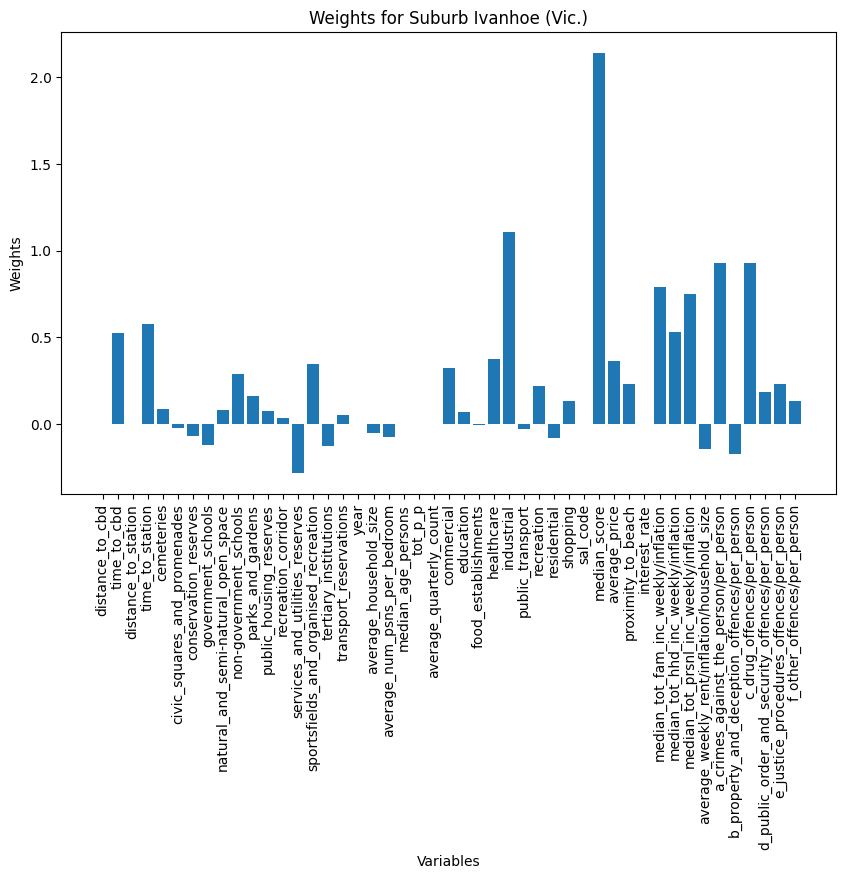

[-0.0, 0.5280253232095291, -0.0, 0.5777304881763379, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, -0.11841328833508269, 0.0849263877327633, 0.290832196177108, 0.1616100690985385, 0.07663828921163196, 0.03890093648784471, -0.2803158443000307, 0.3478504382753808, -0.12329421314397483, 0.05494900918664039, 0.0, -0.04860891239005643, -0.07495594436156237, 0.0, 0.0, -0.0, 0.3265187165076585, 0.0721906741639376, -0.0052388017263938665, 0.3779831650232691, 1.1060147389149366, -0.028723621658934557, 0.2201774316210579, -0.07721039295120785, 0.13486946941521782, 0.0, 2.1378285772298913, 0.36404726378013447, 0.23372405518001643, -0.0, 0.7910012893541573, 0.5331631661413935, 0.7501632117487821, -0.14198402787083617, 0.9303981909799884, -0.1729698088214383, 0.9314182642952241, 0.18519600379165285, 0.23459822791900542, 0.1349493231696472]


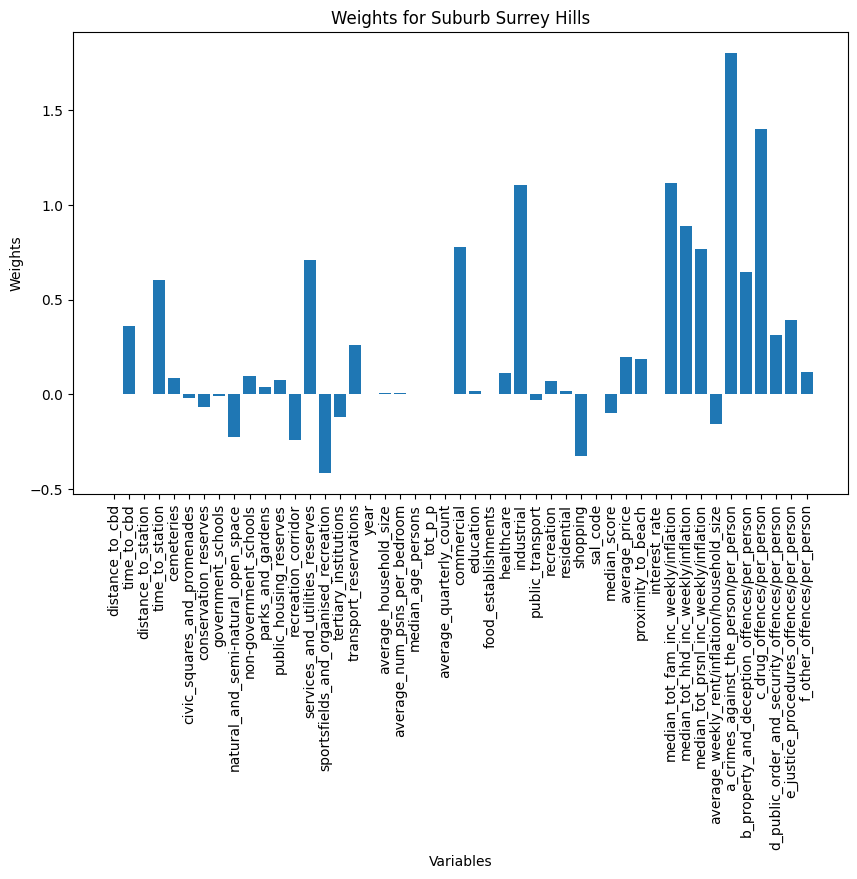

[-0.0, 0.3587975655889874, -0.0, 0.6016132053760039, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, -0.011914945112119836, -0.22782293466132822, 0.09775240567682254, 0.03791431482467049, 0.07663828921163196, -0.23997182165749353, 0.7098548877268299, -0.41664782196645006, -0.12329421314397483, 0.25772204137634275, 0.0, 0.007883119470778683, 0.007708389221342562, 0.0, 0.0, -0.0, 0.7780465601358656, 0.018940009176260243, 0.0030233944823843378, 0.11108353302320698, 1.1060147389149366, -0.028723621658934557, 0.07092364796021916, 0.01607169305625202, -0.3275177344591131, 0.0, -0.10078046141710538, 0.19648614432227032, 0.18826182646326547, -0.0, 1.1174322765684632, 0.890374511835012, 0.7681371517943755, -0.1588569449579444, 1.8039060921694743, 0.6473134642695977, 1.4025125987474096, 0.3135266343632245, 0.39279254794765245, 0.11583493627362375]


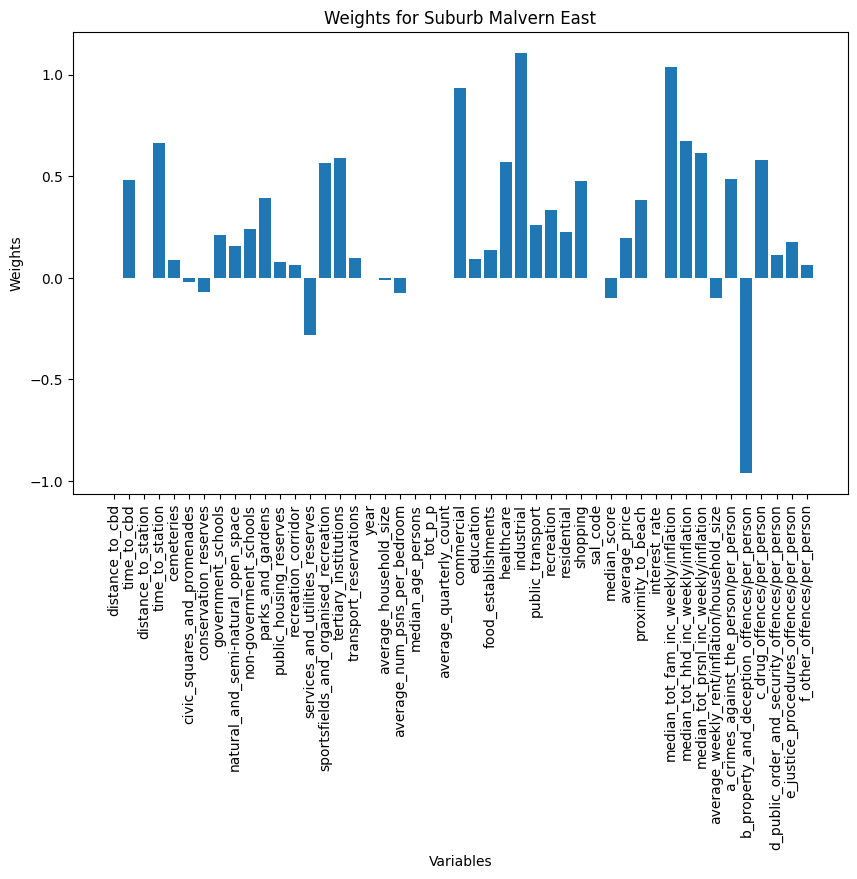

[-0.0, 0.4790490202988007, -0.0, 0.6648884207092823, 0.08557171081375514, -0.02084471417816023, -0.06824589188392581, 0.21063396610893292, 0.15794707014160828, 0.240045568204352, 0.3920561903112507, 0.07663828921163196, 0.06289323344047486, -0.2803158443000307, 0.5658067585086418, 0.5913851483101727, 0.09702821528724165, 0.0, -0.011774790747672249, -0.07495594436156237, -0.0, 0.0, -0.0, 0.9343879705150788, 0.08963922428770453, 0.13550413769970318, 0.5704372609494802, 1.1060147389149366, 0.26055410625072106, 0.332354948536212, 0.22284007486399743, 0.47630962928001574, 0.0, -0.10078046141710538, 0.19648614432227032, 0.3799372184101429, -0.0, 1.0364346257616563, 0.6728482624138689, 0.614536481671564, -0.09835287026610101, 0.48626310527033834, -0.9613189049943538, 0.5769398924079516, 0.11106778372074011, 0.17631198177440507, 0.06381859643797781]


In [223]:
# get weights for the top top_ten
# for every suburb in the top ten, get the weights for each feature
# and graph

import matplotlib.pyplot as plt

# Get the weights for the top ten suburbs
for index, row in list(top_ten.iterrows())[:15]:
    sal_code = row['SAL_NAME21']

    # Get the weights for the suburb
    weights = []

    for i in range(len(variables)):
        weight = row[variables[i]] * coefficients[i]
        weights.append(weight)
    
    # Plot the weights
    plt.figure(figsize=(10, 6))
    plt.bar(variables, weights)
    plt.xlabel('Variables')
    plt.ylabel('Weights')
    plt.title(f'Weights for Suburb {sal_code}')
    plt.xticks(rotation=90)
    plt.show()
    
    print(weights)



In [227]:

# for better visualisaiton, remove suburbs too far outside melbourne
# Compute distance to Melbourne CBD
from math import sqrt
from math import asin, radians
from numpy import sin, cos


melbourne_cbd_coords = (-37.8136, 144.9631)  # Latitude and Longitude of Melbourne CBD

# Function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r

# Apply the function to calculate distance to Melbourne CBD
suburbs['distance_to_CBD'] = suburbs.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

# Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
suburbs = suburbs[suburbs['distance_to_CBD'] <= 100]

In [230]:
suburbs.columns

Index(['SAL_CODE21', 'SAL_NAME21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21',
       'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'sal_code', 'distance_to_cbd', 'time_to_cbd',
       'distance_to_station', 'time_to_station', 'cemeteries',
       'civic_squares_and_promenades', 'conservation_reserves',
       'government_schools', 'natural_and_semi-natural_open_space',
       'non-government_schools', 'parks_and_gardens',
       'public_housing_reserves', 'recreation_corridor',
       'services_and_utilities_reserves',
       'sportsfields_and_organised_recreation', 'tertiary_institutions',
       'transport_reservations', 'year', 'average_household_size',
       'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p',
       'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'median_score',
       'average_pr

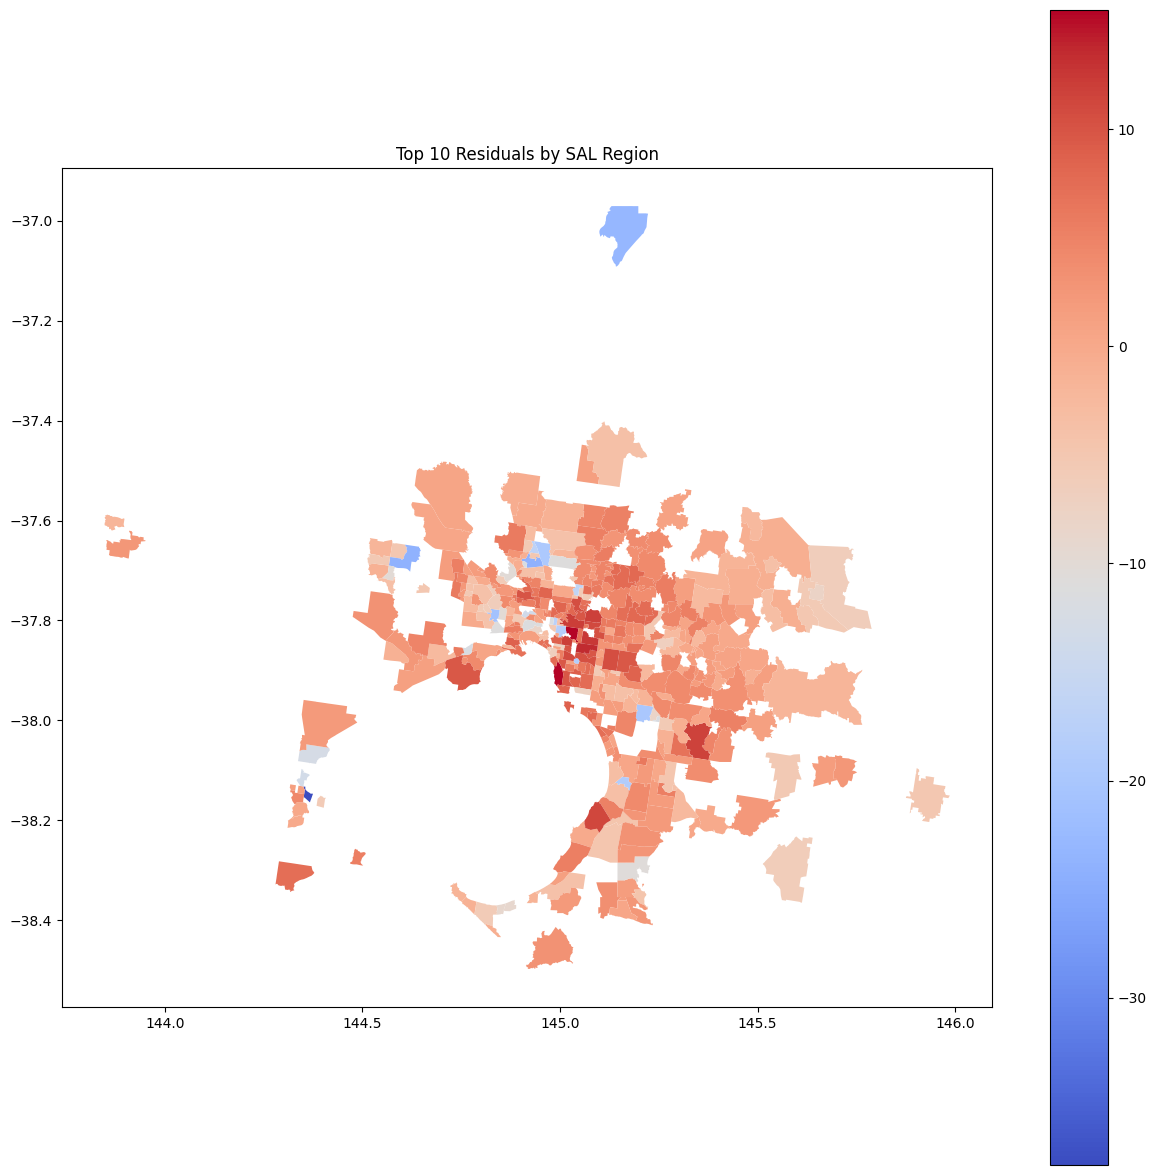

In [231]:


# graph top 10 residuals
fig, ax = plt.subplots(figsize=(15, 15))
suburbs.plot(column='liveability_score', ax=ax, legend=True, cmap='coolwarm')
plt.title('Top 10 Residuals by SAL Region')
plt.show()

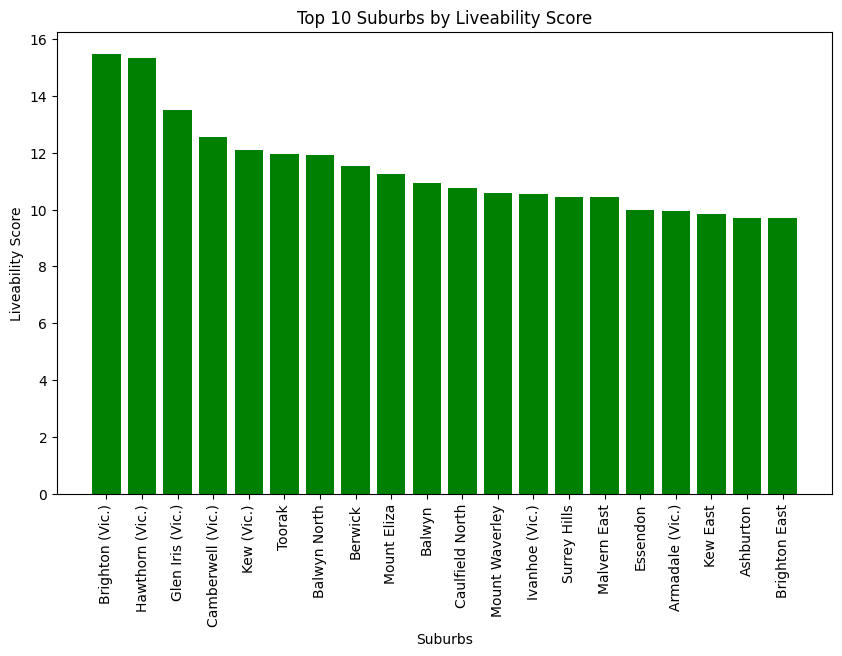

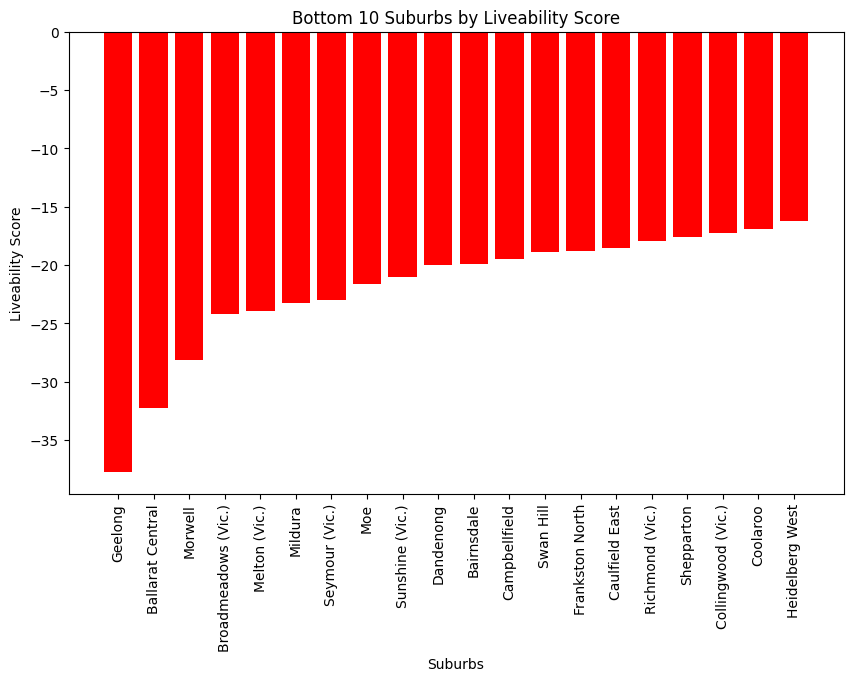

In [234]:
# Bar graph of liveability scores for top ten suburbs
plt.figure(figsize=(10, 6))
plt.bar(top_ten['SAL_NAME21'], top_ten['liveability_score'], color='green')
plt.xlabel('Suburbs')
plt.ylabel('Liveability Score')
plt.title('Top 10 Suburbs by Liveability Score')
plt.xticks(rotation=90)
plt.show()

# Bar graph of liveability scores for bottom ten suburbs
plt.figure(figsize=(10, 6))
plt.bar(bottom_ten['SAL_NAME21'], bottom_ten['liveability_score'], color='red')
plt.xlabel('Suburbs')
plt.ylabel('Liveability Score')
plt.title('Bottom 10 Suburbs by Liveability Score')
plt.xticks(rotation=90)
plt.show()

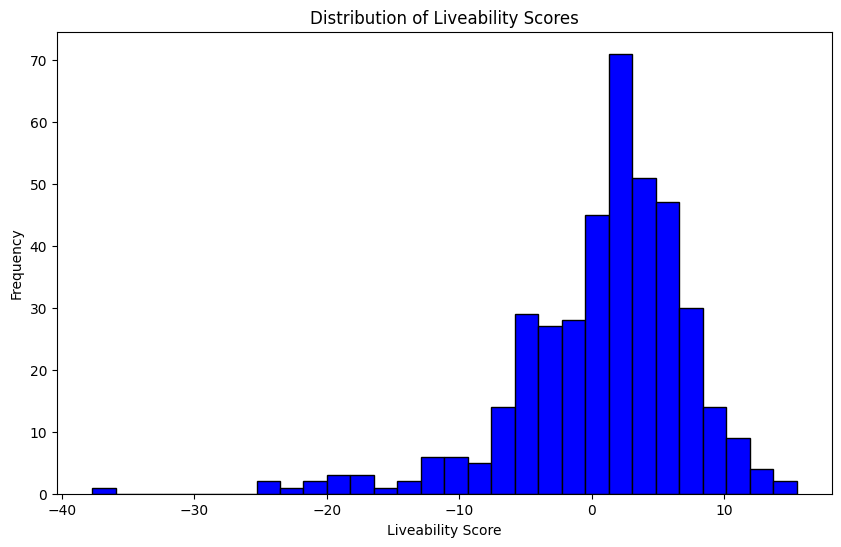

In [235]:
# look at distribution of liveability scores
plt.figure(figsize=(10, 6))
plt.hist(suburbs['liveability_score'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Liveability Score')
plt.ylabel('Frequency')
plt.title('Distribution of Liveability Scores')
plt.show()

In [209]:
top_ten[top_ten['SAL_NAME21'] == 'Croydon (Vic.)']

,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,...,gdp_cbd/inflation/beach,gdp_cbd/inflation/cbd,average_weekly_rent/inflation/household_size,a_crimes_against_the_person/per_person,b_property_and_deception_offences/per_person,c_drug_offences/per_person,d_public_order_and_security_offences/per_person,e_justice_procedures_offences/per_person,f_other_offences/per_person,liveability_score
